In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import numpy as np

In [ ]:
from utils.utils import load_data

FOLDER_PATH = "projekt2_data"

data_df = load_data(FOLDER_PATH, df_delimiter=",")
data_df.head(10)

,SentenceId,Phrase,Sentiment,df_
0,1,a series of escapades demonstrating the adage ...,1,0
1,1,a series of escapades demonstrating the adage ...,2,0
2,1,a series,2,0
3,1,a,2,0
4,1,series,2,0
5,1,of escapades demonstrating the adage that what...,2,0
6,1,of,2,0
7,1,escapades demonstrating the adage that what is...,2,0
8,1,escapades,2,0
9,1,demonstrating the adage that what is good for ...,2,0


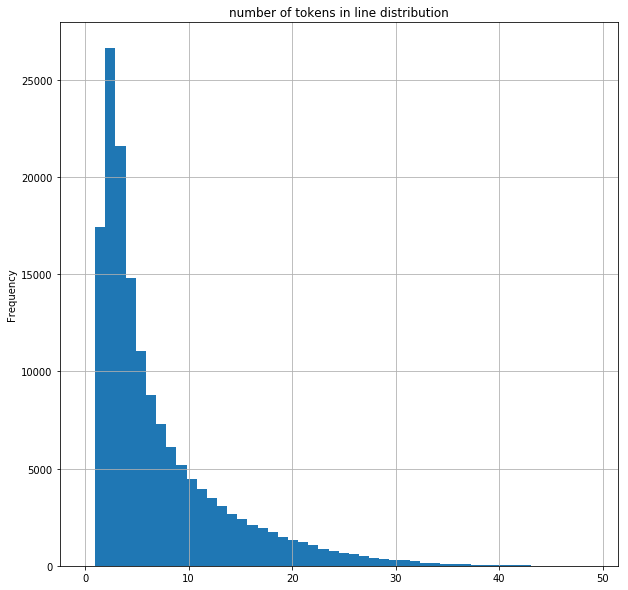

In [ ]:
data_df["Phrase"].str.split().str.len().plot(kind="hist", title="number of tokens in line distribution", grid=True, figsize=(10,10), bins=50);

# BERT

In [ ]:
!pip install bert-tensorflow

     |████████████████████████████████| 71kB 3.4MB/s 


In [ ]:
from preprocess_data.bert_input_converter import get_proper_input_to_bert
from utils.utils_result import save_report, update_fit_params, evaluation

W0527 00:52:07.035179 139661807511424 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14
Using TensorFlow backend.


In [ ]:
MAX_LEN_SEQ = 50
(x_train, y_train), (x_val, y_val), (x_test, y_test) = get_proper_input_to_bert(data_df, x_label="Phrase", y_label="Sentiment", max_len_seq=MAX_LEN_SEQ)

W0527 00:52:15.978278 139661807511424 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
# general parameter setting
tensorboard_params = None

fit_params = {
    "x": x_train,
    "y": y_train,
    "epochs": 50,
    "batch_size": 64,
    "validation_data": (x_val, y_val) 
}

input_params = {
    "shape": (MAX_LEN_SEQ, ),
    "dtype": "int32"
}

test_result_dict = {}

## Word Level

### RNN

In [ ]:
from architecture.models import model_rnn

In [ ]:
# parameters setting
bert_params_rnn = {
    "trainable": False,
    "output_dim": 768,
    "output_type": "sequence_output",
    "signature": "tokens",
    "n_fine_tune_layers": 3
}

model_params_bert_rnn = {
    "input_layer": "bert_input",
    "emb_layer": "Bert",
    "input_params": input_params,
    "emb_params": bert_params_rnn,
    "out_activation": "softmax",
    "out_units": np.unique(y_train).shape[0],
    "loss": "sparse_categorical_crossentropy",
    "optimizer": "adam"
}
model_name = "model_bert_rnn"
model_bert_rnn = model_rnn(model_params_bert_rnn)
fit_params, markered_path = update_fit_params(fit_params, model_name=model_name, tensorboard_params=tensorboard_params)

W0527 00:52:55.365985 139661807511424 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/layers/core.py:143: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


W0527 00:52:58.514394 139661807511424 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 139999 samples, validate on 7800 samples


W0527 00:52:58.633106 139661807511424 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:102: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Epoch 1/50
139999/139999 [==============================] - 968s 7ms/sample - loss: 0.9710 - acc: 0.6009 - val_loss: 0.9304 - val_acc: 0.6137
Epoch 2/50
139999/139999 [==============================] - 966s 7ms/sample - loss: 0.8908 - acc: 0.6332 - val_loss: 0.9058 - val_acc: 0.6179
Epoch 3/50
139999/139999 [==============================] - 967s 7ms/sample - loss: 0.8669 - acc: 0.6423 - val_loss: 0.8891 - val_acc: 0.6337
Epoch 4/50
139999/139999 [==============================] - 964s 7ms/sample - loss: 0.8458 - acc: 0.6485 - val_loss: 0.8848 - val_acc: 0.6294
Epoch 5/50
139999/139999 [==============================] - 961s 7ms/sample - loss: 0.8301 - acc: 0.6551 - val_loss: 0.8801 - val_acc: 0.6312
Epoch 6/50
139999/139999 [==============================] - 960s 7ms/sample - loss: 0.8168 - acc: 0.6604 - val_loss: 0.8795 - val_acc: 0.6290
Epoch 7/50
139999/139999 [==============================] - 962s 7ms/sample - loss: 0.8072 - acc: 0.6643 - val_loss: 0.8806 - val_acc: 0.6344
Epoch 

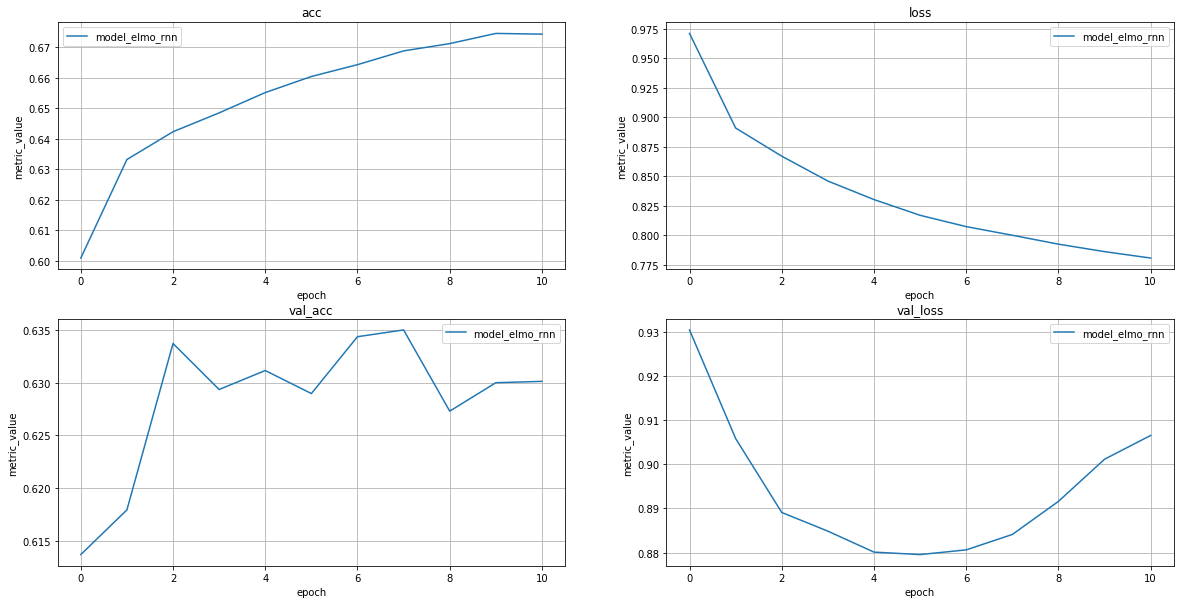

In [16]:
# training
model_bert_rnn.fit(**fit_params);
model_bert_rnn = save_report(model=model_bert_rnn, model_name=model_name, markered_path=markered_path)

In [17]:
# evaluation
test_result_dict = evaluation(model=model_bert_rnn, x_test=x_test, y_test=y_test, model_name=model_name, test_result_dict=test_result_dict)

Wynik na zbiorze testowym modelu model_elmo_rnn, to 0.3467


### CNN

In [ ]:
from architecture.models import model_cnn

In [ ]:
# parameters setting
bert_params_cnn = {
    "trainable": False,
    "output_dim": 768,
    "output_type": "sequence_output",
    "signature": "tokens",
    "n_fine_tune_layers": 3
}

model_params_bert_cnn = {
    "input_layer": "bert_input",
    "emb_layer": "Bert",
    "input_params": input_params,
    "emb_params": bert_params_cnn,
    "out_activation": "softmax",
    "out_units": np.unique(y_train).shape[0],
    "loss": "sparse_categorical_crossentropy",
    "optimizer": "adam"
}
model_name = "model_bert_cnn"
model_bert_cnn = model_cnn(model_params_bert_cnn)
fit_params, markered_path = update_fit_params(fit_params, model_name=model_name, tensorboard_params=tensorboard_params)

Train on 139999 samples, validate on 7800 samples
Epoch 1/50
139999/139999 [==============================] - 520s 4ms/sample - loss: 0.9631 - acc: 0.6105 - val_loss: 0.9175 - val_acc: 0.6158
Epoch 2/50
139999/139999 [==============================] - 515s 4ms/sample - loss: 0.8895 - acc: 0.6332 - val_loss: 0.8996 - val_acc: 0.6238
Epoch 3/50
139999/139999 [==============================] - 515s 4ms/sample - loss: 0.8702 - acc: 0.6407 - val_loss: 0.8957 - val_acc: 0.6244
Epoch 4/50
139999/139999 [==============================] - 515s 4ms/sample - loss: 0.8515 - acc: 0.6474 - val_loss: 0.8922 - val_acc: 0.6301
Epoch 5/50
139999/139999 [==============================] - 515s 4ms/sample - loss: 0.8342 - acc: 0.6540 - val_loss: 0.8941 - val_acc: 0.6277
Epoch 6/50
139999/139999 [==============================] - 515s 4ms/sample - loss: 0.8166 - acc: 0.6610 - val_loss: 0.8887 - val_acc: 0.6292
Epoch 7/50
139999/139999 [==============================] - 515s 4ms/sample - loss: 0.7994 - acc: 

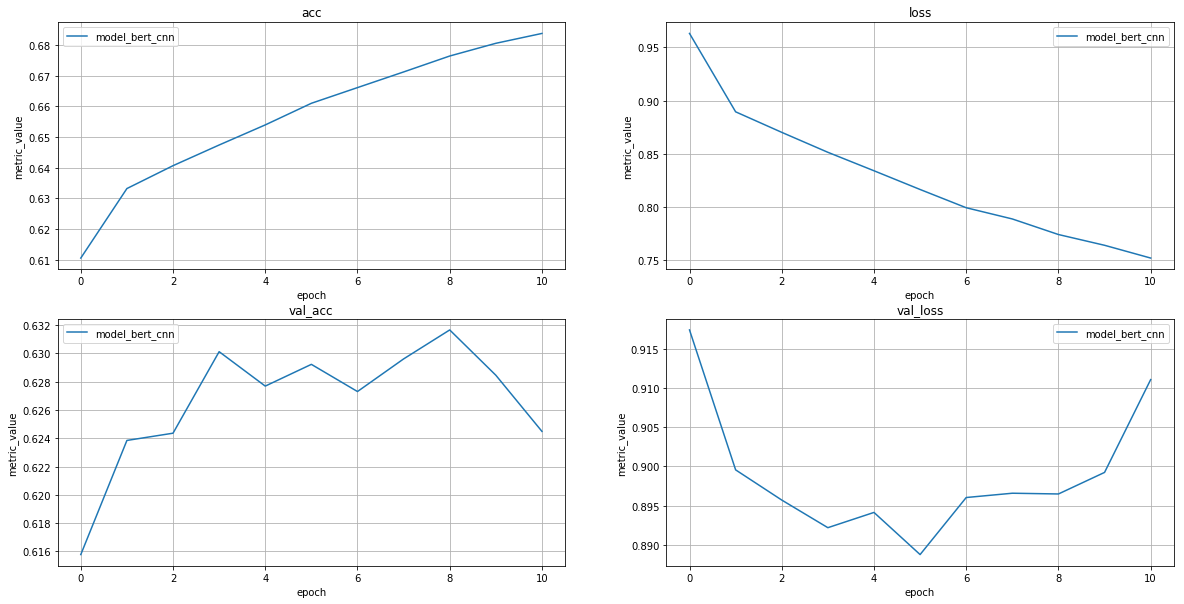

In [20]:
# training
model_bert_cnn.fit(**fit_params);
model_bert_cnn = save_report(model=model_bert_cnn, model_name=model_name, markered_path=markered_path)

In [21]:
# evaluation
test_result_dict = evaluation(model=model_bert_cnn, x_test=x_test, y_test=y_test, model_name=model_name, test_result_dict=test_result_dict)

Wynik na zbiorze testowym modelu model_bert_cnn, to 0.3576


## Phrase Level FFNN

In [ ]:
from architecture.models import model_ffnn

In [ ]:
# parameters setting
bert_params_ffnn = {
    "trainable": False,
    "output_dim": 768,
    "output_type": "pooled_output",
    "signature": "tokens",
    "n_fine_tune_layers": 3
}

model_params_bert_ffnn = {
    "input_layer": "bert_input",
    "emb_layer": "Bert",
    "input_params": input_params,
    "emb_params": bert_params_ffnn,
    "out_activation": "softmax",
    "out_units": np.unique(y_train).shape[0],
    "loss": "sparse_categorical_crossentropy",
    "optimizer": "adam"
}
model_name = "model_bert_ffnn"
model_bert_ffnn = model_ffnn(model_params_bert_ffnn)
fit_params, markered_path = update_fit_params(fit_params, model_name=model_name, tensorboard_params=tensorboard_params)

Train on 139999 samples, validate on 7800 samples
Epoch 1/50
139999/139999 [==============================] - 505s 4ms/sample - loss: 1.0517 - acc: 0.5732 - val_loss: 1.5725 - val_acc: 0.4937
Epoch 2/50
139999/139999 [==============================] - 503s 4ms/sample - loss: 0.9752 - acc: 0.5976 - val_loss: 1.2537 - val_acc: 0.5515
Epoch 3/50
139999/139999 [==============================] - 503s 4ms/sample - loss: 0.9588 - acc: 0.6048 - val_loss: 1.0387 - val_acc: 0.5627
Epoch 4/50
139999/139999 [==============================] - 503s 4ms/sample - loss: 0.9481 - acc: 0.6087 - val_loss: 1.0876 - val_acc: 0.5612
Epoch 5/50
139999/139999 [==============================] - 503s 4ms/sample - loss: 0.9424 - acc: 0.6113 - val_loss: 0.9973 - val_acc: 0.5782
Epoch 6/50
139999/139999 [==============================] - 504s 4ms/sample - loss: 0.9382 - acc: 0.6123 - val_loss: 1.2770 - val_acc: 0.5341
Epoch 7/50
139999/139999 [==============================] - 503s 4ms/sample - loss: 0.9321 - acc: 

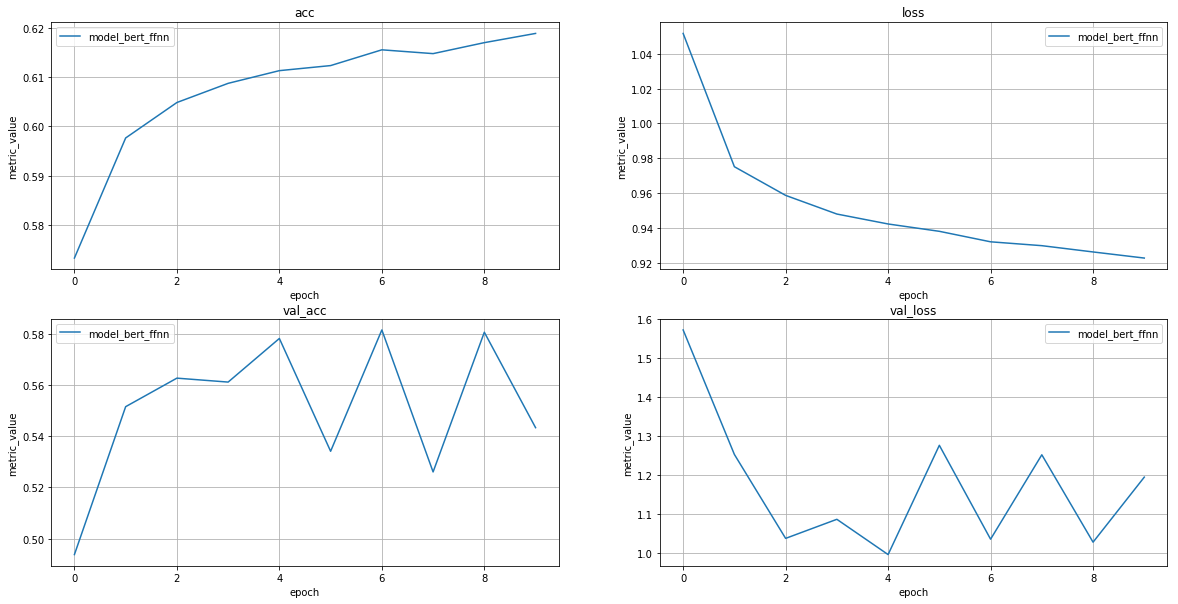

In [24]:
# training
model_bert_ffnn.fit(**fit_params);
model_bert_ffnn = save_report(model=model_bert_ffnn, model_name=model_name, markered_path=markered_path)

In [25]:
# evaluation
test_result_dict = evaluation(model=model_bert_ffnn, x_test=x_test, y_test=y_test, model_name=model_name, test_result_dict=test_result_dict)

Wynik na zbiorze testowym modelu model_bert_ffnn, to 0.3633


# Results

In [26]:
test_result_dict

{'model_bert_cnn': 0.35761145627876395,
 'model_bert_ffnn': 0.3633149408284024,
 'model_elmo_rnn': 0.3467332182774491}

In [ ]:
from utils.utils_result import update_common_history_folder, display_results

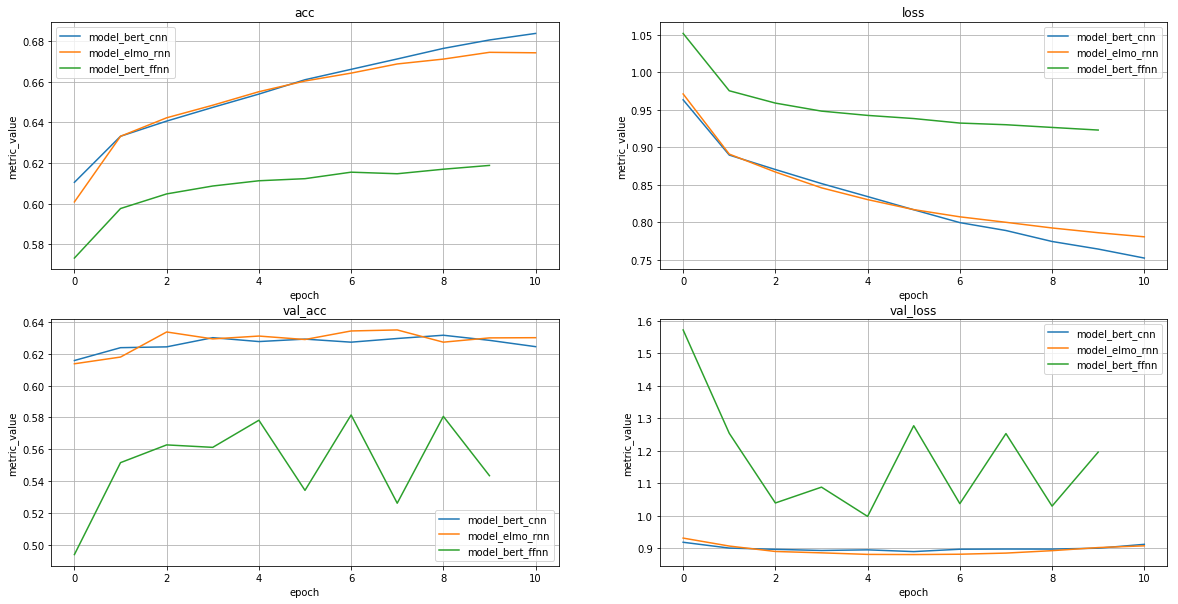

In [28]:
update_common_history_folder("about_model")
display_results("about_models/comparision")